# Imports & funcs

In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
from funcs import *
from stats import *

from iminuit import Minuit
from iminuit.cost import LeastSquares, UnbinnedNLL, ExtendedUnbinnedNLL, ExtendedBinnedNLL, BinnedNLL

In [2]:
R_L = 39.4
R_g = 68
Ls = []
Ls_err = []

In [3]:
def V_r_carica(t, R, L, V_o, c):
    return V_o*(1-np.exp(-t*R/L)) + c

In [4]:
def V_RL(t,V_o,R,L,T, offset):
    return V_o* 2*(np.exp(-t*R/L) / (1 + np.exp( -T*R/L) ) ) + offset

def V_RL_2(t,V_o,R,L,T):
    return V_o* 2*(np.exp(-(t-(T/2))*R/L) / (1 + np.exp( -T*R/L) ) )

def V_RL_basic(t,V_o,tau,c):
    return V_o*(np.exp(-t/tau))+c

# RL

## R = 100 $\Omega$

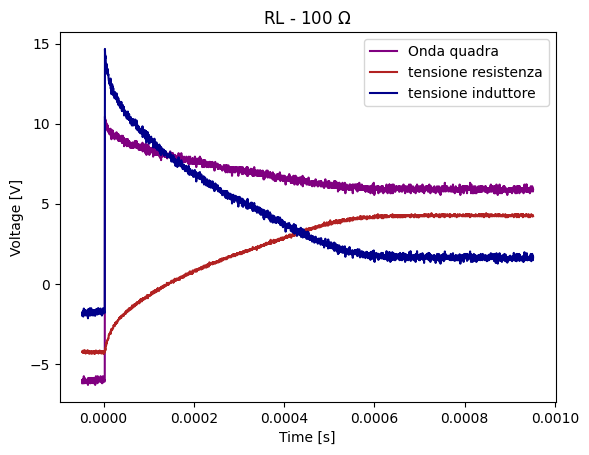

In [5]:
RL_100_quadra, RL_100_res, RL_100_ind = get_data("data/RL_100/")
if RL_100_ind[1] == None:   RL_100_ind = RL_100_quadra[0], (RL_100_quadra[1] - RL_100_res[1])

cut = False

i = 0
if cut:
    v = RL_100_quadra[1][0]
    while(v < np.max(RL_100_quadra[1])):
        v = RL_100_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 100 $\Omega$')
plt.plot(RL_100_quadra[0][i:],RL_100_quadra[1][i:], c='purple')
plt.plot(RL_100_res[0][i:],  RL_100_res[1][i:],   c='firebrick')
plt.plot(RL_100_ind[0][i:],  RL_100_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.savefig('imgs/RL/RL_100.pdf',bbox_inches='tight')

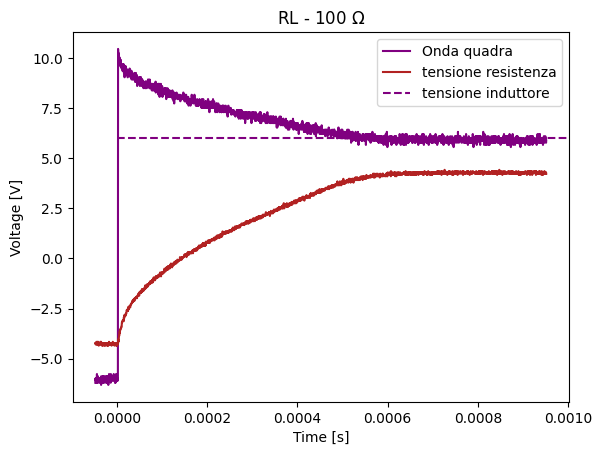

In [6]:
plt.title('RL - 100 $\Omega$')
plt.plot(RL_100_quadra[0][i:],RL_100_quadra[1][i:], c='purple')
plt.plot(RL_100_res[0][i:],  RL_100_res[1][i:],   c='firebrick')
# plt.plot(RL_100_ind[0][i:],  RL_100_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.axhline(y=6, xmin=.09,color='purple', linestyle='--')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.savefig('imgs/RL/RL_100_onda_quadra.pdf',bbox_inches='tight')

## R = 200 $\Omega$

127


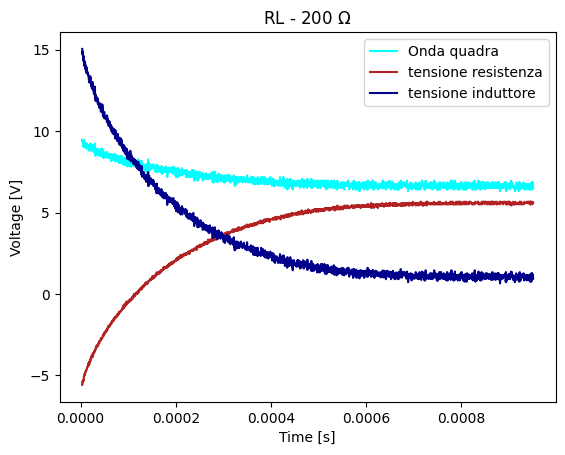

In [7]:
RL_200_quadra, RL_200_res, RL_200_ind = get_data("data/RL_200/")
if RL_200_ind[1] == None:   RL_200_ind = RL_200_quadra[0], (RL_200_quadra[1] - RL_200_res[1])

cut = True

i = 0
if cut:
    v = RL_200_quadra[1][0]
    while(v < np.max(RL_200_quadra[1])):
        v = RL_200_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 200 $\Omega$')
plt.plot(RL_200_quadra[0][i:],RL_200_quadra[1][i:], c='cyan')
plt.plot(RL_200_res[0][i:],  RL_200_res[1][i:],   c='firebrick')
plt.plot(RL_200_ind[0][i:],  RL_200_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [8]:
c = LeastSquares(RL_200_res[0][127:],RL_200_res[1][127:], .1, V_r_carica)
m = Minuit(c, R=200+R_g+R_L, V_o=5, L= 60e-3, c=0)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Ls_err.append(m.errors['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

## R = 400 $\Omega$

107


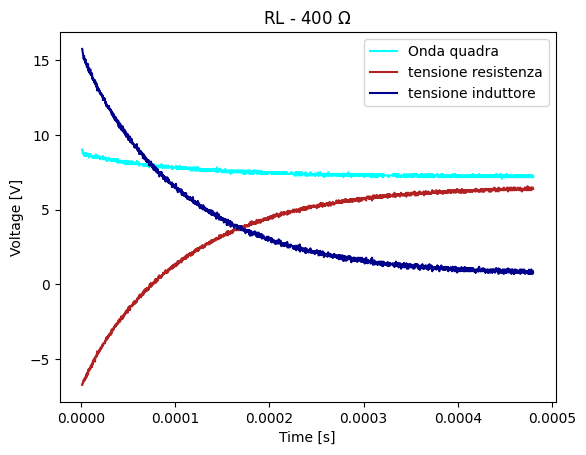

In [9]:
RL_400_quadra, RL_400_res, RL_400_ind = get_data("data/RL_400/")
if RL_400_ind[1] == None:   RL_400_ind = RL_400_quadra[0], (RL_400_quadra[1] - RL_400_res[1])

cut = True

i = 0
if cut:
    v = RL_400_quadra[1][0]
    while(v < np.max(RL_400_quadra[1])):
        v = RL_400_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 400 $\Omega$')
plt.plot(RL_400_quadra[0][i:],RL_400_quadra[1][i:], c='cyan')
plt.plot(RL_400_res[0][i:],  RL_400_res[1][i:],   c='firebrick')
plt.plot(RL_400_ind[0][i:],  RL_400_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [10]:
c = LeastSquares(RL_400_res[0][127:],RL_400_res[1][127:], .1, V_r_carica)
m = Minuit(c, R=400+R_g+R_L, V_o=5, L= 60e-3, c=0)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls_err.append(m.errors['L'])
Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

## R = 1000 $\Omega$

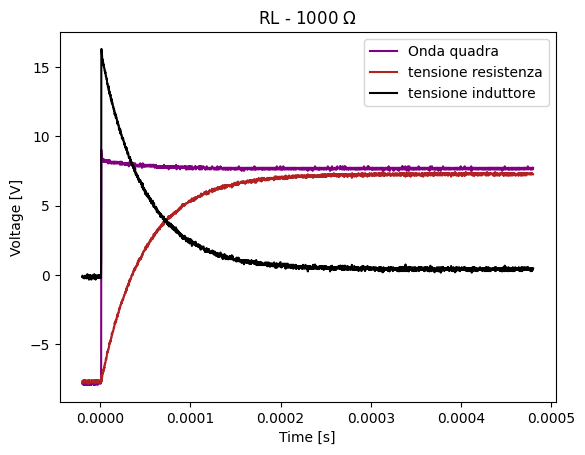

In [11]:
RL_1000_quadra, RL_1000_res, RL_1000_ind = get_data("data/RL_1000/")
if RL_1000_ind[1] == None:   RL_1000_ind = RL_1000_quadra[0], (RL_1000_quadra[1] - RL_1000_res[1])

cut = False

i = 0
if cut:
    v = RL_1000_quadra[1][0]
    while(v < np.max(RL_1000_quadra[1])):
        v = RL_1000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 1000 $\Omega$')
plt.plot(RL_1000_quadra[0][i:],RL_1000_quadra[1][i:], c='purple')
plt.plot(RL_1000_res[0][i:],  RL_1000_res[1][i:],   c='firebrick')
plt.plot(RL_1000_ind[0][i:],  RL_1000_ind[1][i:],   c='k')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.savefig('imgs/RL/RL_1000_data.pdf',bbox_inches='tight')

In [12]:
c = LeastSquares(RL_1000_res[0][107:],RL_1000_res[1][107:], .06, V_r_carica)
m = Minuit(c, R=1000+R_g+R_L, V_o=5, L= 60e-3, c=0)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls_err.append(m.errors['L'])
Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

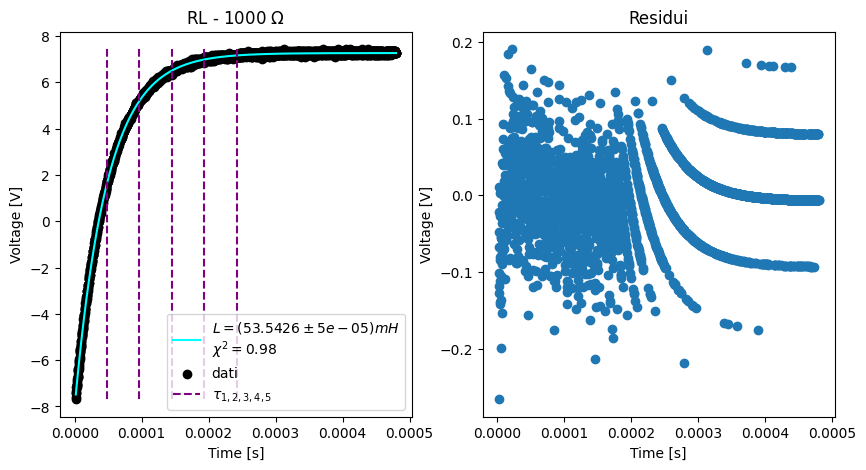

In [13]:
resti = [i-j for i,j in zip(RL_1000_res[1][107:], V_r_carica(RL_1000_res[0][107:], 1000+R_g+R_L, m.values['L'], m.values['V_o'], m.values['c']))]

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
plt.title('RL - 1000 $\Omega$')
plt.plot(RL_1000_res[0][107:],V_r_carica(RL_1000_res[0][107:], 1000+R_g+R_L, m.values['L'], m.values['V_o'], m.values['c']), c='cyan',
         label=f'$L = ({round(m.values["L"]*1e3,4)} \pm {round(m.errors["L"],5)}) mH$ \n'+f'$\chi^2 = {round(m.fval/m.ndof, 2)}$')
plt.scatter(RL_1000_res[0][107:],RL_1000_res[1][107:], c='k', label='dati')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
tau = m.values['L']/m.values['R']
plt.vlines(x=[tau,2*tau,3*tau,4*tau,5*tau], ymin=np.min(RL_1000_res[1][107:]),ymax=np.max(RL_1000_res[1][107:]), color='purple', linestyle='--', label=r'$\tau_{1,2,3,4,5}$')
plt.legend()

plt.subplot(1,2,2)
plt.title('Residui')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [s]')

plt.scatter(RL_1000_res[0][107:],resti)

plt.savefig('imgs/RL/RL_1000_fit.pdf',bbox_inches='tight')

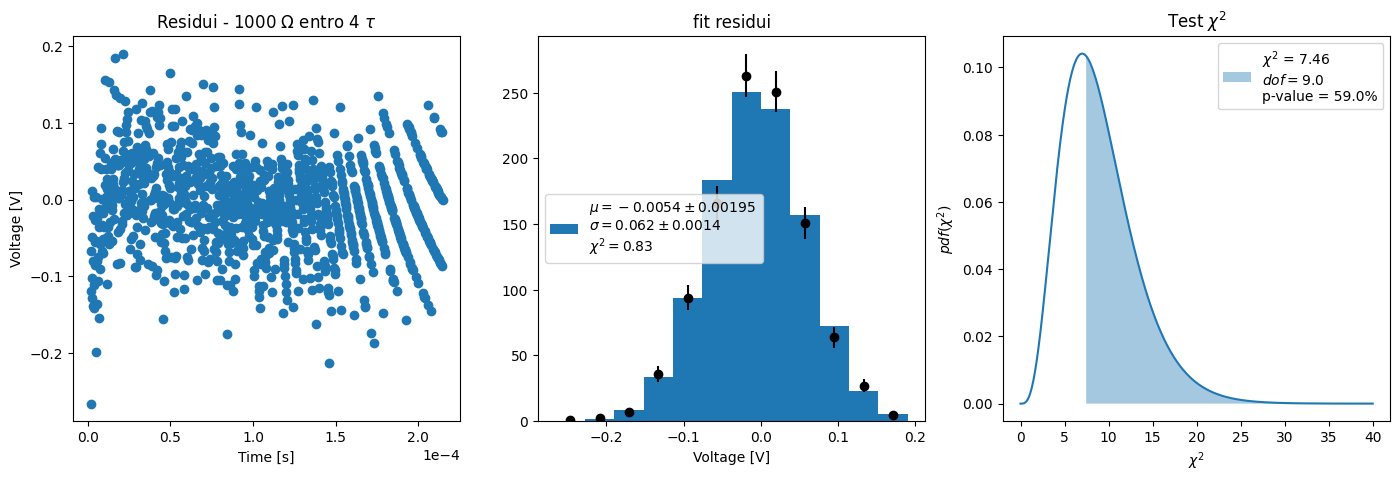

In [14]:
N = 1067
plt.subplots(1,3,figsize=(17,5))

plt.subplot(1,3,1)

plt.title(r'Residui - 1000 $\Omega$ entro 4 $\tau$')

plt.scatter(RL_1000_res[0][107:107+N],resti[:N])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.subplot(1,3,2)

plt.title('fit residui')
plt.xlabel('Voltage [V]')

a,b = np.histogram(resti[:N],bins=sturges_rule(resti[:N]))

c_ = ExtendedBinnedNLL(a,b, normal_scaled_cdf)
m_ = Minuit(c_, mu=0, sigma=.1, scale=N)
m_.limits['sigma'] = (0,np.inf)
m_.simplex()
m_.migrad()
m_.hesse()
m_.visualize()
plt.legend([f'$\mu = {round(m_.values["mu"],4)} \pm {round(m_.errors["mu"],5)}$ \n'+f'$\sigma = {round(m_.values["sigma"],3)} \pm {round(m_.errors["sigma"],4)}$'+'\n$\chi^2 = '+f'{abs(round(m_.fval/m_.ndof, 2))}$'])

plt.subplot(1,3,3)
chi_test(m_.fval,m_.ndof,40)

plt.savefig('imgs/RL/RL_1000_residui_secondo.pdf',bbox_inches='tight')

## R = 2000 $\Omega$

107


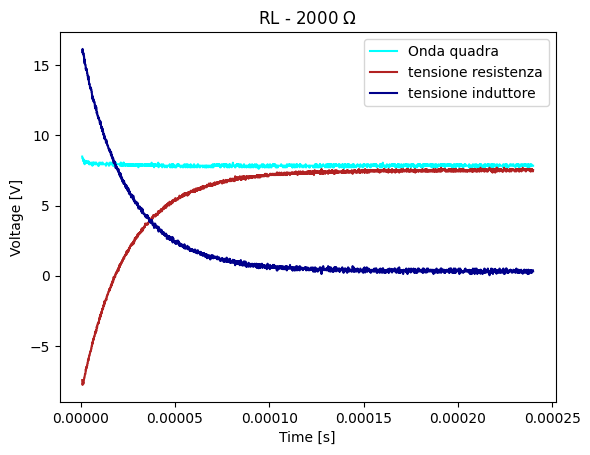

In [15]:
RL_2000_quadra, RL_2000_res, RL_2000_ind = get_data("data/RL_2000/")
if RL_2000_ind[1] == None:   RL_2000_ind = RL_2000_quadra[0], (RL_2000_quadra[1] - RL_2000_res[1])

cut = True

i = 0
if cut:
    v = RL_2000_quadra[1][0]
    while(v < np.max(RL_2000_quadra[1])):
        v = RL_2000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 2000 $\Omega$')
plt.plot(RL_2000_quadra[0][i:],RL_2000_quadra[1][i:], c='cyan')
plt.plot(RL_2000_res[0][i:],  RL_2000_res[1][i:],   c='firebrick')
plt.plot(RL_2000_ind[0][i:],  RL_2000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [16]:
c = LeastSquares(RL_2000_res[0][110:],RL_2000_res[1][110:], .1, V_r_carica)
m = Minuit(c, R=2000+R_g+R_L, V_o=5, L= 60e-3, c=0)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls_err.append(m.errors['L'])
Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

$\tau $ = 2.4692959981172337e-05


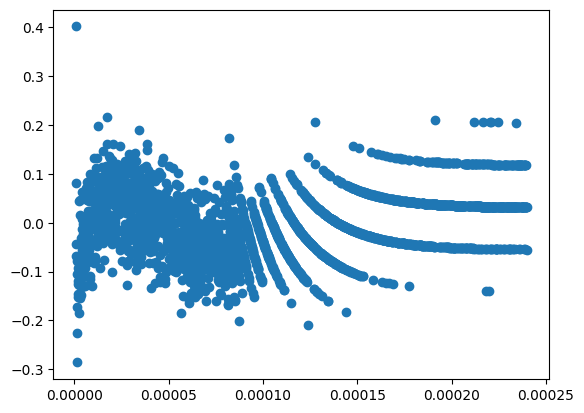

In [17]:
resti = [i-j for i,j in zip(RL_2000_res[1][107:], V_r_carica(RL_2000_res[0][107:], 2000+R_g+R_L, m.values['L'], m.values['V_o'], m.values['c']))]
plt.scatter(RL_2000_res[0][107:],resti)
print(r'$\tau $ =',m.values['L']/m.values['R'])

## R = 3000 $\Omega$

97


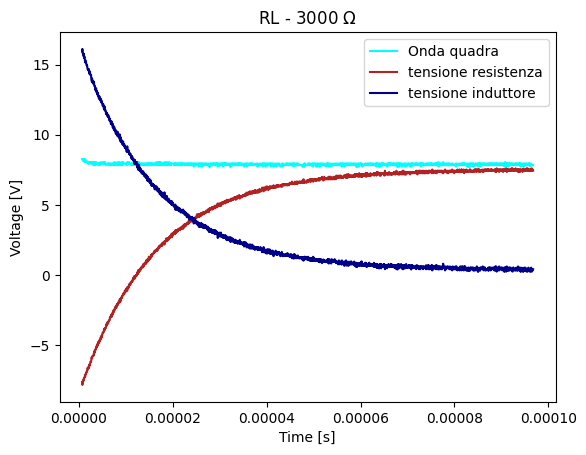

In [18]:
RL_3000_quadra, RL_3000_res, RL_3000_ind = get_data("data/RL_3000/")
if RL_3000_ind[1] == None:   RL_3000_ind = RL_3000_quadra[0], (RL_3000_quadra[1] - RL_3000_res[1])

cut = True

i = 0
if cut:
    v = RL_3000_quadra[1][0]
    while(v < np.max(RL_3000_quadra[1])):
        v = RL_3000_quadra[1][i]
        i+=1
i += 9
print(i)
plt.title('RL - 3000 $\Omega$')
plt.plot(RL_3000_quadra[0][i:],RL_3000_quadra[1][i:], c='cyan')
plt.plot(RL_3000_res[0][i:],  RL_3000_res[1][i:],   c='firebrick')
plt.plot(RL_3000_ind[0][i:],  RL_3000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [19]:
c = LeastSquares(RL_3000_res[0][97:],RL_3000_res[1][97:], .1, V_r_carica)
m = Minuit(c, R=3000+R_g+R_L, V_o=5, L= 60e-3, c=0)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls_err.append(m.errors['L'])
Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

## R = 4000 $\Omega$

97


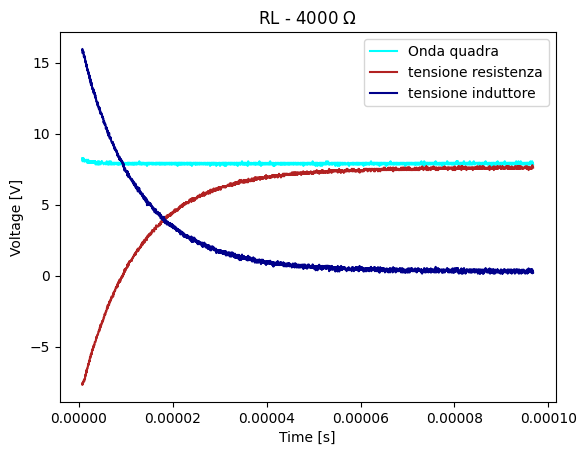

In [20]:
RL_4000_quadra, RL_4000_res, RL_4000_ind = get_data("data/RL_4000/")
if RL_4000_ind[1] == None:   RL_4000_ind = RL_4000_quadra[0], (RL_4000_quadra[1] - RL_4000_res[1])

cut = True

i = 0
if cut:
    v = RL_4000_quadra[1][0]
    while(v < np.max(RL_4000_quadra[1])):
        v = RL_4000_quadra[1][i]
        i+=1
i+=10
print(i)

plt.title('RL - 4000 $\Omega$')
plt.plot(RL_4000_quadra[0][i:],RL_4000_quadra[1][i:], c='cyan')
plt.plot(RL_4000_res[0][i:],  RL_4000_res[1][i:],   c='firebrick')
plt.plot(RL_4000_ind[0][i:],  RL_4000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [21]:
c = LeastSquares(RL_4000_res[0][97:],RL_4000_res[1][97:], .1, V_r_carica)
m = Minuit(c, R=4000+R_g+R_L, V_o=16.275, L= 60e-3, c=-8.714)

m.fixed['R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls_err.append(m.errors['L'])
Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]*1e3} $mH$')

<IPython.core.display.Latex object>

# RL

In [22]:
H_mean, H_mean_err = media_pesata(Ls, Ls_err)
Latex(f'$L_{{ind}}$ = {round(H_mean*1e3, 2)} $\pm$ {round(H_mean_err*1e3, 3)} $mH$')

<IPython.core.display.Latex object>

In [23]:
H_mean + H_mean_err, H_mean_err

(0.05239945043026753, 2.70174421446645e-05)

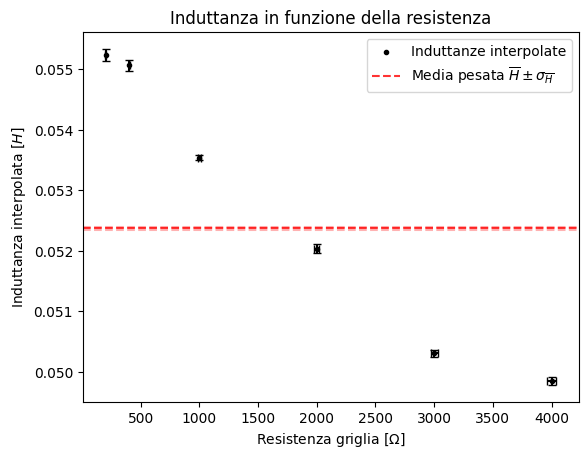

In [24]:
Rs = [200,400,1000,2000,3000,4000]
Rs_err = np.array(Rs)*0.01
plt.title('Induttanza in funzione della resistenza')
plt.xlabel('Resistenza griglia [$\Omega$]')
plt.ylabel('Induttanza interpolata [$H$]')
plt.scatter(Rs,Ls, marker='.', c='k')
plt.errorbar(Rs,Ls, yerr=Ls_err,xerr=Rs_err, fmt='none',capsize=3, c='k')
plt.axhline(y=H_mean, color='r', linestyle='--', alpha=0.8)
plt.axhline(y=H_mean-H_mean_err, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=H_mean+H_mean_err, color='r', linestyle='--', alpha=0.3)
plt.legend(['Induttanze interpolate', 'Media pesata $\overline{H} \pm \sigma_{\overline{H}}$'])
plt.savefig('imgs/RL/RL_val.pdf',bbox_inches='tight')

In [25]:
def pol(x,a,b,c,d,e):
    return a*np.power(x,4)+b*np.power(x,3)+c*np.power(x,2)+d*x+e

In [26]:
c = LeastSquares(Rs,Ls, Ls_err, pol)
m = Minuit(c, a=0, b=0, c=0, d=0, e=0)
m.simplex()
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.29 (χ²/ndof = 11.3)     │              Nfcn = 588              │
│ EDM = 3.42e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 0.096e-15 │ 0.026e-15 │            │            │         │         │       │
│ 1 │ b    │ -0.75e-12 │ 0.21e-12  │            │            │         │         │       │
│ 2 │ c    │  2.1e-9   │  0.6e-9   │            │            │         │         │       │
│ 3 │ d    │  -3.9e-6  │  0.5e-6   │            │            │         │         │       │
│ 4 │ e    │ 56.13e-3  │  0.16e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────────────────────────────────────────────────────────────────┐
│   │                   a                   b                   c                   d                   e │
├───┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ a │            6.63e-34         -5.4775e-30      14.3318886e-27  -12.7975053598e-24 2.8850706104836e-21 │
│ b │         -5.4775e-30            4.56e-26         -120.78e-24       109.82122e-21    -25.45646554e-18 │
│ c │      14.3318886e-27         -120.78e-24            3.26e-19         -304.97e-18        74.15633e-15 │
│ d │  -12.7975053598e-24       109.82122e-21         -304.97e-18            3.02e-13          -80.41e-12 │
│ e │ 2.8850706104836e-21    -25.45646554e-18        74.15633e-15          -80.41e-12             2.6e-08 │
└───┴─────────────────────────────────────────────────────────────────────────────────────────────────────┘